In [1]:
import os
os.chdir('..')  # Mueve el directorio de trabajo un nivel arriba

In [2]:
os.getcwd()  # Muestra la ruta actual


'c:\\Users\\esteb\\Desktop\\physics\\mestrado_thz_physics'

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks
import scipy.signal.windows as win
import scipy as sp
import warnings
import re
from ipywidgets import interact,widgets
from scipy.optimize import curve_fit
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.misc import derivative
from functions_master import *
import warnings

# Suprimir FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def FourierT2(f,N):
    return np.conj(sp.fft.fft(f.values,n=N))


In [6]:
#plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "stix"#"dejavuserif" 
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['font.size'] = 15; plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15; plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 20; plt.rcParams['ytick.labelsize'] = 20 # Tamanho da fonte dos números do eixo y
plt.rcParams['svg.fonttype'] = 'none'

In [7]:
ruta_actual = os.getcwd()

carpeta = os.path.join(ruta_actual,'paper_window','ZnO da Fernandas','Signal')

carpeta_ref = os.path.join(ruta_actual,'paper_window', 'ZnO da Fernandas','substrate')

archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))

archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
N = 1 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\paper_window\ZnO da Fernandas\Signal\carpeta1\Average_295.25K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\paper_window\ZnO da Fernandas\Signal\carpeta1.
Archivo c:\Users\esteb\Desktop\physics\mestrado_thz_physics\paper_window\ZnO da Fernandas\substrate\carpeta1\Average_295.6K.dat generado en c:\Users\esteb\Desktop\physics\mestrado_thz_physics\paper_window\ZnO da Fernandas\substrate\carpeta1.


In [9]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

In [10]:
colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

# bis = [0.02,0.03,0.06,0.07,0.1,0.15] # Porcentaje de Bismuto.

delta_ls = {"20-20": 0, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20-20"
d = 0.00004




interactive(children=(FloatSlider(value=380.0, continuous_update=False, description='left', max=420.0, min=350…

<function __main__.anim2(left, right_sample, right_subs, index, correc_subs, desv)>

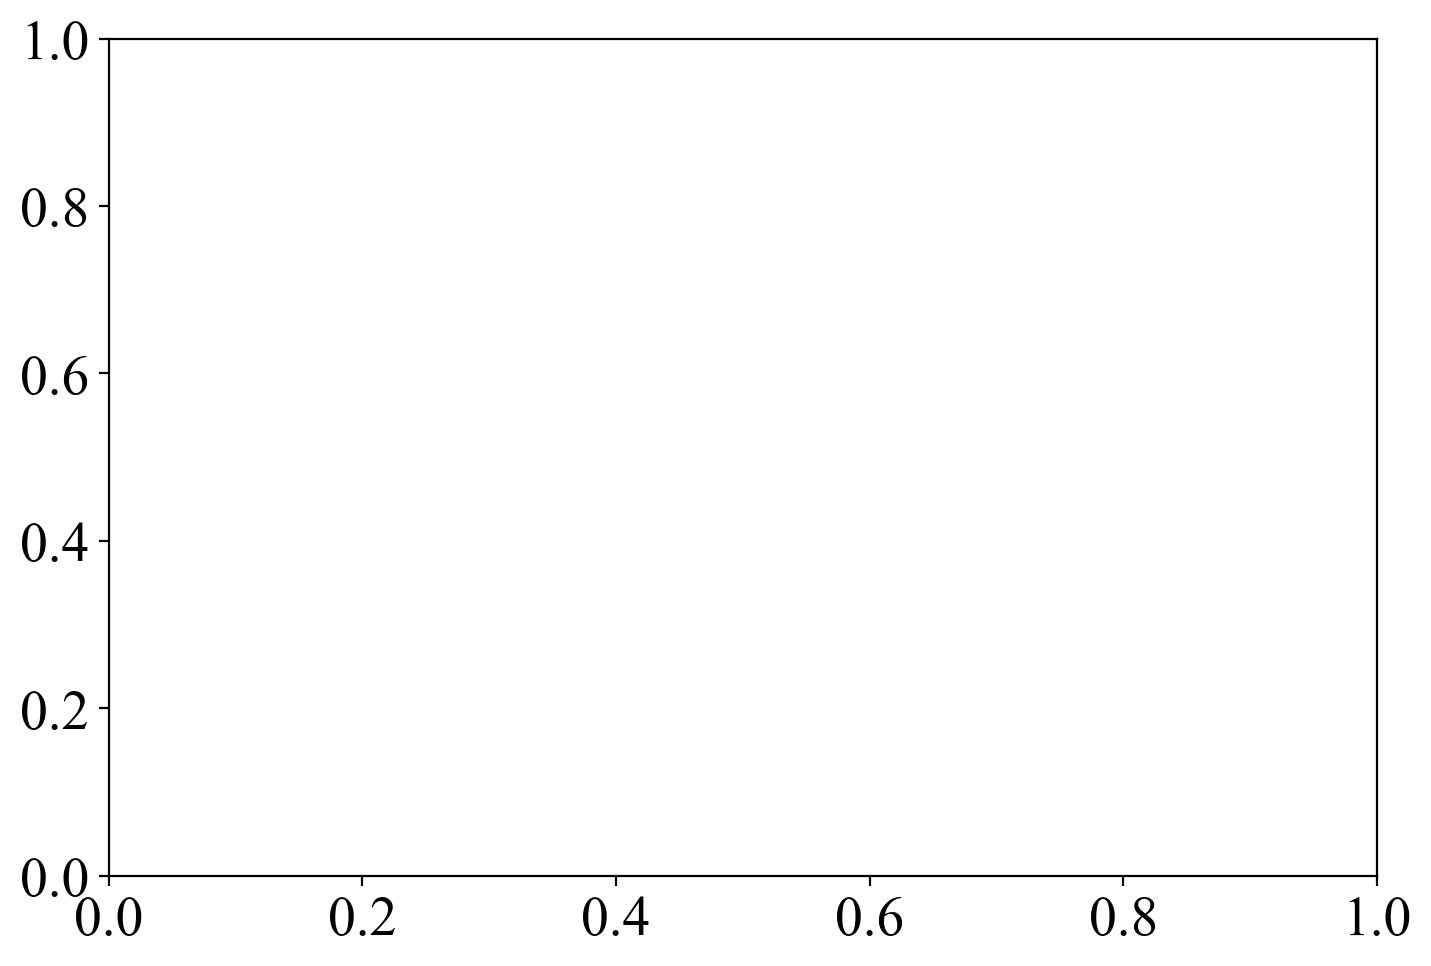

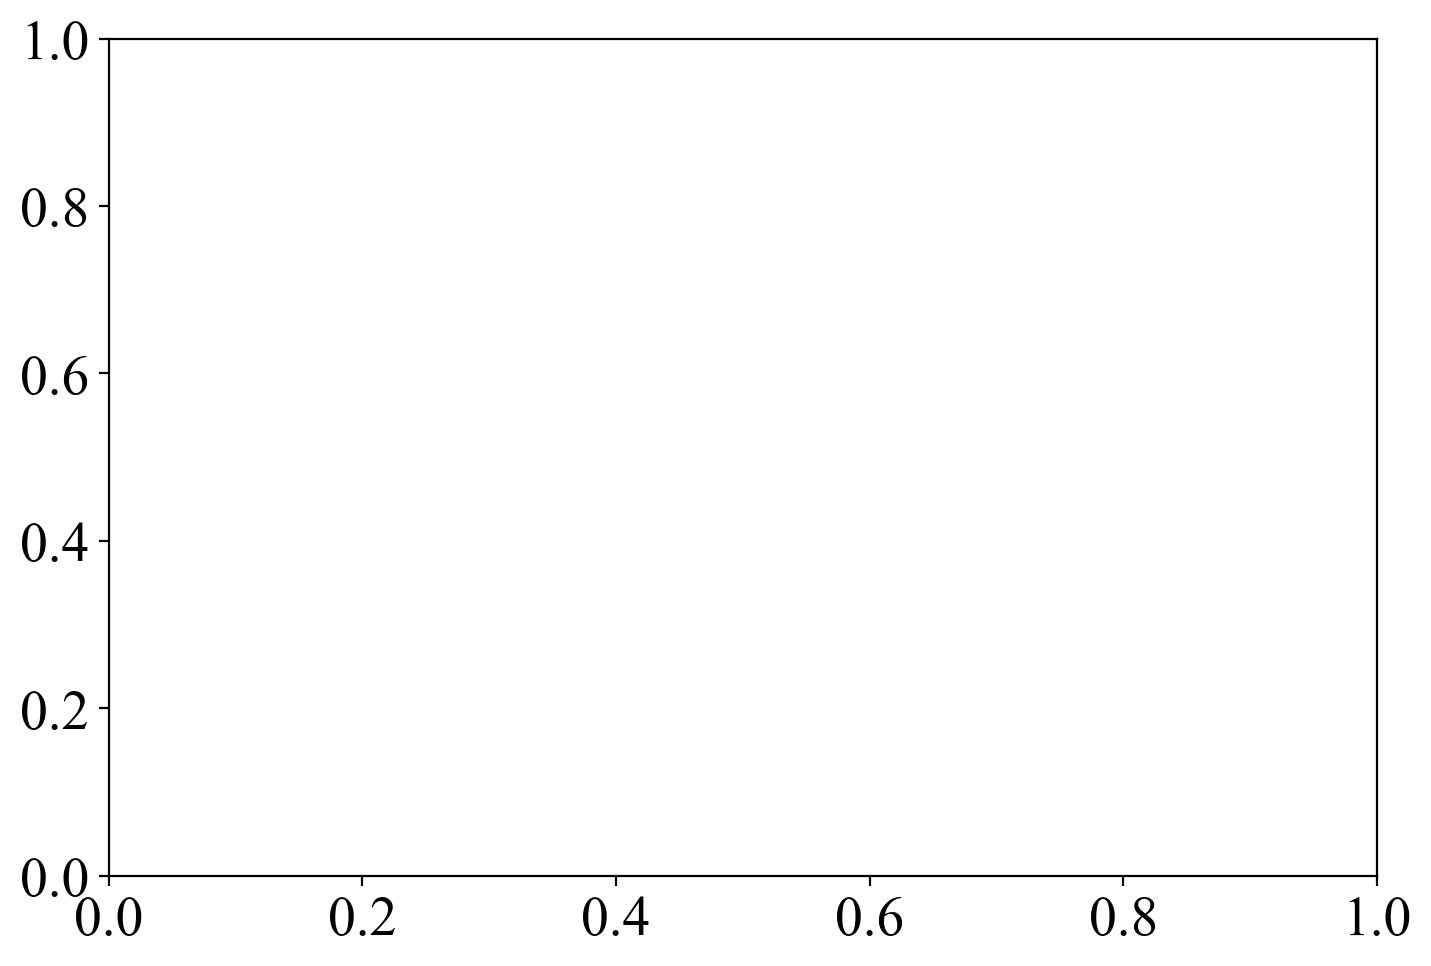

In [ ]:
def anim2(left,right_sample,right_subs,index,correc_subs,desv):
    
    f = plt.figure(figsize=(18, 25),dpi=200)

    N = 2**12

    global nk0, nk1, nk2
    nk0 = left
    nk1 = right_sample
    nk2 = right_subs

    path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
    params_window = ['gaussian', desv]
   # params_window = ['flattop']
    # params_window = ['barthann']

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

    # Datos sin ventana.
    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

    # Datos con ventana.
    
    plt.subplot(421)
     # Determinar el período de la señal
    x_min, x_max = np.min(x_ref), np.max(x_ref)
    period = x_max - x_min  # Longitud del período

    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x_ref - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x_ref] + x_right)
    y_periodic = np.tile(y_ref, 2 * n_repeats + 1)  
    #plt.plot(x,y/max(y),'k',label='Signal rectangle window')
    plt.plot(x_ref,y_ref/max(y_ref),'--r',label='Reference using rectangle window')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='red', alpha=0.4)
    # plt.plot(x,ventana,'r',label='Barthann window')
    # plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada),'o',color = colors[-int(index)],label='Signal + window')
    plt.xlabel('t [ps]')
    plt.title(f'T = '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend(loc='upper right')

    plt.subplot(422)

     # Determinar el período de la señal
    x_min, x_max = np.min(x), np.max(x)
    period = x_max - x_min  # Longitud del período
    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x] + x_right)
    y_periodic = np.tile(y, 2 * n_repeats + 1)  

    plt.plot(x,y/max(y),'k',label='Film signal using rectangle window')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='black', alpha=0.4)

    plt.legend(loc='upper right')
    


    plt.subplot(423)
     # Determinar el período de la señal
    plt.plot(y_substrate_padding*ventana/max(y_substrate_padding*ventana),'k',label=f'Reference+rectangle+{params_window[0]} window')
    plt.plot(y_substrate_padding/max(y_substrate_padding),'r',label=f'Reference+rectangle window')
    plt.plot(ventana,color='silver',label=f'{params_window[0]} window')
    # plt.plot(y_subs_ventana/max(y_subs_ventana),'--r',label='Substrate + window')
    plt.xlabel('t [ps]')
    #plt.title(f'T = '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend()

    plt.subplot(424)

    plt.plot(y_signal_ventaneada/max(y_signal_ventaneada),'k',label=f'Film signal+rectangle+{params_window[0]} window')
    plt.plot(y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana),'r',label=f'Reference+rectangle window')
    plt.plot(ventana,color='silver',label=f'{params_window[0]} window')
    plt.legend()


    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.0
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_window = fft_window[mask]

    global delta_ls_corr

    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 2.6
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    plt.subplot(425)

    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada),'k',label='FFT substrate using windows')
    plt.plot(nu_filtradas, np.abs(fft_y_subs), 'r',label='FFT substrate using rectangle window')
    plt.yscale('log')
    #plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()


    plt.subplot(426)

    plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)/max(np.abs(fft_y_signal_ventaneada)),'k', label='FFT signal with window')
    plt.plot(nu_filtradas, np.abs(fft_y_signal)/max(np.abs(fft_y_signal)), 'r',label='FFT substrate using windows ')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')
    
    plt.ylabel('Absoluto value Fourier Transform')
    plt.yscale('log')
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()

    plt.subplot(427)
    plt.plot(nu_filtradas, np.imag(ep_con)*1e-3, 'k', label='Using window ')
    plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r',label='Rectangle window')
    #plt.yscale('log')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    plt.legend()


    plt.subplot(428)
    plt.plot(nu_filtradas, np.real(ep_con)*1e-3, 'k', label='Using windows')
    plt.plot(nu_filtradas, np.real(ep_sin)*1e-3, 'r',label='Rectangle window')
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    plt.legend()

    plt.savefig("my_figure.png", dpi=300, bbox_inches='tight', format='png')
    plt.show()
  

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        left= widgets.FloatSlider(min=350,max=420,value=380,step=0.1,**opc),
        right_sample= widgets.FloatSlider(min=350,max=420,value=392,step=0.1,**opc),
        right_subs= widgets.FloatSlider(min=350,max=420,value=390,step=0.1,**opc),
        index= widgets.FloatSlider(min=0,max=len(archivos_ordenados_s)-1,value=6,step=1,**opc),
        correc_subs=widgets.FloatSlider(min=-delta_ls[sample],max=delta_ls[sample],value=-0.028,step=0.001,**opc),
        desv = widgets.FloatSlider(min=0,max=200,value=100,step=0.001,**opc)

        )

# SAFIRA

In [5]:
ruta_actual = os.getcwd()

carpeta = os.path.join(ruta_actual,'paper_window','test','signal')
carpeta_ref = os.path.join(ruta_actual,'paper_window', 'test','ref')


archivos_dat = glob.glob(os.path.join(os.path.join(carpeta,'carpeta1'), '*.dat'))

archivos_dat_ref = glob.glob(os.path.join(os.path.join(carpeta_ref,'carpeta1'), '*.dat'))

# Elimina cada archivo
for archivo in archivos_dat:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

for archivo in archivos_dat_ref:
    os.remove(archivo)
    #print(f'Archivo {archivo} eliminado.')

warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
N = 1 # Variable para agrupar datos de temperatura de N en N datos 

convert_dats(carpeta,N)
convert_dats(carpeta_ref,N)

Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\paper_window\test\signal\carpeta1\Average_296.3K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\paper_window\test\signal\carpeta1.
Archivo c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\paper_window\test\ref\carpeta1\Average_296.15K.dat generado en c:\Users\esmaru\Desktop\Esteban\repos\mestrado_thz_physics\paper_window\test\ref\carpeta1.


In [7]:
#path_analisis = r'C:\Users\usuario_trabajo\Desktop\physics\TESIS\20-20\20-20\carpeta1'
path_analisis = os.path.join(carpeta,'carpeta1')
path_analisis_ref = os.path.join(carpeta_ref,'carpeta1')

# Obtener lista de archivos .dat en la carpeta
archivos = os.listdir(path_analisis)
archivos2 = os.listdir(path_analisis_ref)

# Filtrar y ordenar los archivos por la temperatura
archivos_ordenados_s = sorted(
    archivos,
    key=lambda x: extraer_temperatura(x)
)

archivos_ordenados_ref = sorted(
    archivos2,
    key=lambda x: extraer_temperatura(x)
)

In [8]:
colors = plt.cm.jet(np.linspace(0, 1, len(archivos_ordenados_s)))[::-1]

# bis = [0.02,0.03,0.06,0.07,0.1,0.15] # Porcentaje de Bismuto.

delta_ls = {"20-20": 0, # Substrato - mostra. (Mostra = substrato + FILM ) FILM -> OBJETO DE ESTUDIO. BaF2
}  # SINN BISMUTO.

sample = "20-20"
d = 0.00094




In [ ]:
def anim2(left,right_sample,right_subs,index,correc_subs,desv):
    
    f = plt.figure(figsize=(18, 25),dpi=200)

    N = 2**12

    global nk0, nk1, nk2
    nk0 = left
    nk1 = right_sample
    nk2 = right_subs

    path_signal = os.path.join(path_analisis,archivos_ordenados_s[int(index)])
    path_ref = os.path.join(path_analisis_ref ,archivos_ordenados_ref[int(index)])
    #params_window = ['gaussian', desv]
    params_window = ['flattop']
    # params_window = ['barthann']

    phase, y_signal_ventaneada, y_substrate_padding, ventana = getSignalWindowed(path_signal,path_ref,left,right_sample,right_subs,params_window)

    # Datos sin ventana.
    x,y = getFilterdata(path_signal,right_sample,left)
    x_ref,y_ref = getFilterdata(path_ref,right_subs,left)

    # Datos con ventana.
    
    plt.subplot(421)
     # Determinar el período de la señal
    x_min, x_max = np.min(x_ref), np.max(x_ref)
    period = x_max - x_min  # Longitud del período

    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x_ref - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x_ref + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x_ref] + x_right)
    y_periodic = np.tile(y_ref, 2 * n_repeats + 1)  
    #plt.plot(x,y/max(y),'k',label='Signal rectangle window')
    plt.plot(x_ref,y_ref/max(y_ref),'--r',label='Reference using rectangle window')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='red', alpha=0.4)
    # plt.plot(x,ventana,'r',label='Barthann window')
    # plt.plot(x,y_signal_ventaneada/max(y_signal_ventaneada),'o',color = colors[-int(index)],label='Signal + window')
    plt.xlabel('t [ps]')
    plt.title(f'T = '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend(loc='upper right')

    plt.subplot(422)

     # Determinar el período de la señal
    x_min, x_max = np.min(x), np.max(x)
    period = x_max - x_min  # Longitud del período
    # Número de repeticiones a izquierda y derecha
    n_repeats = 1

    # Crear copias desplazadas de la señal de forma generalizada
    x_left = [x - period * i for i in range(n_repeats, 0, -1)]
    x_right = [x + period * i for i in range(1, n_repeats + 1)]
    x_periodic = np.concatenate(x_left + [x] + x_right)
    y_periodic = np.tile(y, 2 * n_repeats + 1)  

    plt.plot(x,y/max(y),'k',label='Film signal using rectangle window')
    plt.plot(x_periodic, y_periodic/max(y_periodic), label="Periodic signal", color='black', alpha=0.4)

    plt.legend(loc='upper right')
    


    plt.subplot(423)
     # Determinar el período de la señal
    plt.plot(y_substrate_padding*ventana/max(y_substrate_padding*ventana),'k',label=f'Reference+rectangle+{params_window[0]} window')
    plt.plot(y_substrate_padding/max(y_substrate_padding),'r',label=f'Reference+rectangle window')
    plt.plot(ventana,color='silver',label=f'{params_window[0]} window')
    # plt.plot(y_subs_ventana/max(y_subs_ventana),'--r',label='Substrate + window')
    plt.xlabel('t [ps]')
    #plt.title(f'T = '+str(extraer_temperatura(archivos_ordenados_s[int(index)]))+' K')
    plt.legend()

    plt.subplot(424)

    plt.plot(y_signal_ventaneada/max(y_signal_ventaneada),'k',label=f'Film signal+rectangle+{params_window[0]} window')
    plt.plot(y_signal_ventaneada*ventana/max(y_signal_ventaneada*ventana),'r',label=f'Film signal+rectangle window')
    plt.plot(ventana,color='silver',label=f'{params_window[0]} window')
    plt.legend()


    k = 15
    nu = sp.fft.fftfreq(N, 1/30)
        # Aplicar ventana de Hamming a la señal
    
    y_subs_ventana = pd.Series(y_substrate_padding*ventana)
    y_signal_ventaneada = pd.Series(y_signal_ventaneada*ventana)

    # Transformada de Fourier de las señales
    fft_y_signal_ventaneada = FourierT2(y_signal_ventaneada,N)[1:len(nu)//k]
    fft_y_subs_ventaneada = FourierT2(y_subs_ventana,N)[1:len(nu)//k]

    fft_y_signal= FourierT2(y,N)[1:len(nu)//k]
    fft_y_subs = FourierT2(y_ref,N)[1:len(nu)//k]

    fft_window = FourierT2(pd.Series(ventana),N)[1:len(nu)//k]

     # Filtrar las frecuencias
    nu = nu[1:len(nu)//k]
    xmin, xmax = 0.2, 1.5
    mask = (nu >= xmin) & (nu <= xmax)
    nu_filtradas = nu[mask]
    fft_y_signal_ventaneada = fft_y_signal_ventaneada[mask]
    fft_y_subs_ventaneada = fft_y_subs_ventaneada[mask]

    fft_y_signal= fft_y_signal[mask]
    fft_y_subs = fft_y_subs[mask]
    fft_window = fft_window[mask]

    global delta_ls_corr

    delta_ls_corr = delta_ls[sample] + correc_subs
    T_ventana = (fft_y_signal_ventaneada/fft_y_subs_ventaneada)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)*np.exp(1j*2*np.pi*nu_filtradas*phase*1/30)
    T = (fft_y_signal/fft_y_subs)*np.exp(2*np.pi*1j*nu_filtradas/c*(1-2.6)*delta_ls_corr)
    n = 3.05
    ep_con = 1j*(1+n)*((1/T_ventana)-1)*c/(2*np.pi*nu_filtradas*d)-n
    ep_sin = 1j*(1+n)*((1/T)-1)*c/(2*np.pi*nu_filtradas*d)-n

    plt.subplot(425)

    plt.plot(nu_filtradas, np.abs(fft_y_subs_ventaneada),'k',label='FFT substrate using windows')
    plt.plot(nu_filtradas, np.abs(fft_y_subs), 'r',label='FFT substrate using rectangle window')
    plt.yscale('log')
    plt.ylabel('Absolute Value Fourier Transform',fontsize=15)
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()


    plt.subplot(426)

    plt.plot(nu_filtradas, np.abs(fft_y_signal_ventaneada)/max(np.abs(fft_y_signal_ventaneada)),'k', label='FFT film signal using windows')
    plt.plot(nu_filtradas, np.abs(fft_y_signal)/max(np.abs(fft_y_signal)), 'r',label='FFT film signal using rectangle window')
    
    #plt.plot(nu_filtradas,np.abs(fft_window)/max(fft_window),'r',label='FFT window')
    
    
    plt.yscale('log')
    #plt.xlabel(r'$\nu$ [THz]',fontsize=15)
    plt.legend()

    plt.subplot(427)
    plt.plot(nu_filtradas, np.imag(ep_con), 'k', label='Using window ')
    #plt.plot(nu_filtradas, np.imag(ep_sin)*1e-3, 'r',label='Rectangle window')
    #plt.yscale('log')
    plt.xlabel(r'$\omega$ [THz]')
    plt.ylabel(r'$\epsilon^{(2)}\times 10^{-3}$')
    #plt.xlabel(r'$\omega$ [THz]')
    plt.legend()


    plt.subplot(428)
    plt.plot(nu_filtradas, np.real(ep_con), 'k', label='Using windows')
    #plt.plot(nu_filtradas, np.real(ep_sin), 'r',label='Rectangle window')
    plt.ylabel(r'$\epsilon^{(1)}\times 10^{-3}$')
    plt.xlabel(r'$\omega$ [THz]')
    #plt.title(f'Delta sample real:{round(delta_ls[sample],4)}, Delta sample correg: {round(delta_ls_corr,5)}')
    plt.legend()

    plt.savefig("my_figure.png", dpi=300, bbox_inches='tight', format='png')
    plt.show()
  

opc=dict(continuous_update=False,readout_format=".3f")
interact(anim2,       
        left= widgets.FloatSlider(min=350,max=420,value=374.4,step=0.1,**opc),
        right_sample= widgets.FloatSlider(min=350,max=420,value=383.5,step=0.1,**opc),
        right_subs= widgets.FloatSlider(min=350,max=420,value=382.7,step=0.1,**opc),
        index= widgets.FloatSlider(min=0,max=len(archivos_ordenados_s)-1,value=6,step=1,**opc),
        correc_subs=widgets.FloatSlider(min=-delta_ls[sample],max=delta_ls[sample],value=-0.028,step=0.001,**opc),
        desv = widgets.FloatSlider(min=0,max=200,value=100,step=0.001,**opc)

        )

interactive(children=(FloatSlider(value=374.4, continuous_update=False, description='left', max=420.0, min=350…

<function __main__.anim2(left, right_sample, right_subs, index, correc_subs, desv)>